## **Surrogate Modeling of Diffusion Equation Solutions**

In [12]:
# Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

### **Import Data**

In [13]:
# Import Input Data
datain = pd.read_csv('inputs.csv',header=None)
datain.head()

,0,1,2,3
0,65.531,29.46400,79.9890,45.6370
1,50.511,10.19500,1.4267,85.4360
2,46.943,0.77441,86.7170,4.6934
3,46.061,59.53600,40.2500,52.9970
4,13.048,6.20750,18.4450,47.4490


In [14]:
# Import Output Data
dataou = pd.read_csv('U.csv',header=None)
dataou.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,72.758,77.7550,78.8690,79.2340,79.4030,79.5000,79.5630,79.605,79.6350,79.6560,...,36.5100,36.5100,36.5100,36.5100,36.5100,36.5090,36.501,36.449,36.0930,33.6500
1,25.969,8.9758,5.1663,3.9013,3.2983,2.9402,2.7008,2.529,2.3999,2.2993,...,68.3490,68.3490,68.3490,68.3480,68.3470,68.3380,68.275,67.846,64.9050,44.7430
2,66.826,80.5850,83.6600,84.6730,85.1490,85.4270,85.6090,85.735,85.8270,85.8950,...,3.7547,3.7547,3.7547,3.7547,3.7546,3.7542,3.751,3.729,3.5782,2.5449
3,43.156,41.1450,40.6950,40.5470,40.4770,40.4360,40.4090,40.391,40.3770,40.3670,...,42.3970,42.3970,42.3970,42.3970,42.3980,42.4010,42.419,42.545,43.4120,49.3540
4,15.747,17.6170,18.0380,18.1780,18.2460,18.2870,18.3150,18.335,18.3510,18.3630,...,37.9590,37.9590,37.9590,37.9590,37.9580,37.9530,37.919,37.685,36.0790,25.0700


### **Data Splitting**

In [15]:
# Create train-test splits
datain_train, datain_test, dataou_train, dataou_test = train_test_split(datain,dataou,test_size=0.3,random_state=42)

### **Data Scaling**

In [16]:
# Create scalers
scalerin = MinMaxScaler(feature_range=(0,1))
scalerou = MinMaxScaler(feature_range=(0,1))

# Fit Scalers to data
scalerin.fit(datain)
scalerou.fit(dataou)

# Scale the datasets
datain_train_sc = scalerin.transform(datain_train)
datain_test_sc = scalerin.transform(datain_test)
dataou_train_sc = scalerou.transform(dataou_train)
dataou_test_sc = scalerou.transform(dataou_test)

### **Create Model**

In [17]:
# Define layers
hidden_layers = [2500*6]

# Define Model
model = tf.keras.models.Sequential()

# Add Input Layer and First Hidden Layer
model.add(Dense(hidden_layers[0],activation='relu',input_dim=4))
model.add(Dropout(rate=0.5))

# Add Output layer
model.add(Dense(2500,activation='linear'))

# Compile Model
model.compile(optimizer='adam',loss='mean_squared_error')

# Model Summary
model.summary()

# Fit Model
model_fit = model.fit(datain_train_sc,dataou_train_sc,epochs=50,batch_size=16,verbose=1,shuffle=True,validation_split=0.05)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15000)             75000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 15000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2500)              37502500  
Total params: 37,577,500
Trainable params: 37,577,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
14/14 [==============================] - 1s 23ms/step - loss: 0.0998 - val_loss: 0.0295
Epoch 2/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0278 - val_loss: 0.0124
Epoch 3/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0057 - val_loss: 0.0019
Epoch 4/50
14/14 [==============================] - 0s 9ms/step - loss: 0.002

In [18]:
# Compute model predictions
dataes_train_sc = model.predict(datain_train_sc)
dataes_test_sc = model.predict(datain_test_sc)

In [19]:
# Scale back data
dataes_train = scalerou.inverse_transform(dataes_train_sc)
dataes_test = scalerou.inverse_transform(dataes_test_sc)

### **Visualize**

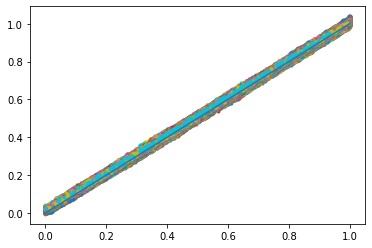

In [20]:
# Check model predictions against training data
plt.plot(dataou_train_sc,dataes_train_sc,'.')
plt.plot([0,1],[0,1]);

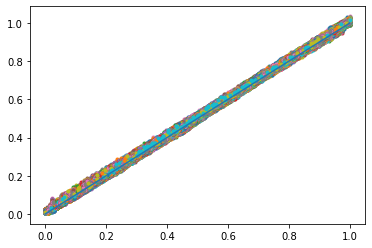

In [21]:
# Check model predictions against training data
plt.plot(dataou_test_sc,dataes_test_sc,'.')
plt.plot([0,1],[0,1]);

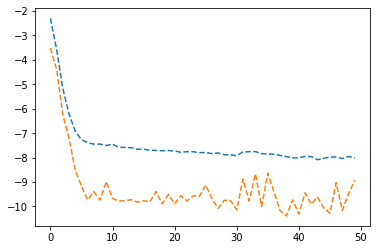

In [22]:
# Check loss and validation loss
plt.plot(np.log(model_fit.history['loss']),'--');
plt.plot(np.log(model_fit.history['val_loss']),'--');

### **Export Data**

In [23]:
# Convert scaled output
dataes_train_pd = pd.DataFrame(dataes_train)
dataes_test_pd = pd.DataFrame(dataes_test)

# Export Input Data
datain_train.to_csv('datain_train.csv')
datain_test.to_csv('datain_test.csv')

# Export Output Data
dataes_train_pd.to_csv('dataes_train.csv')
dataes_test_pd.to_csv('dataes_test.csv')